In [12]:
%matplotlib inline
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
import collections
from keras.utils import np_utils

max_length = 0

In [13]:
with open('./data/training.1600000.processed.noemoticon.csv', 'r', encoding='ISO-8859-1') as f:
    data = f.readlines()
    data = [data[i].rstrip('\n').split(',', 5) for i in range(0, len(data), 20)]
y = np.array([int(v[0].strip('"')) for v in data])
y = np.where(y==4, 1, y)
data = [v[-1].strip('"').replace('.', '').replace(',', '') for v in data]

word_freq = collections.Counter()
data_num = len(data)
for row in data:
    words = nltk.word_tokenize(row.strip().lower())
    max_length = max(max_length, len(words))
    for word in words:
        if word not in word_freq:
            word_freq[word] = 0
        word_freq[word] += 1

segment_len = min(9999, max_length)
vocab_size = len(word_freq) + 2
word2index = {x: i+2 for i, x in enumerate(word_freq)}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

x = np.empty(data_num, dtype=list)
for i, sentence in enumerate(data):
    words = nltk.word_tokenize(sentence.strip().lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    x[i] = seqs

y = np_utils.to_categorical(y, 2)

tmp_x, te_x, tmp_y, te_y = train_test_split(x, y, test_size=0.2, random_state=1)

112


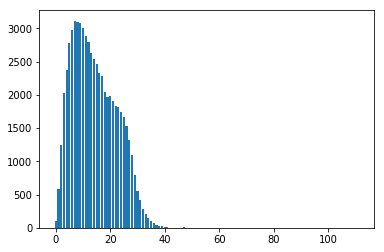

In [14]:
print(max_length)
length = [0] * max_length
for x in tmp_x:
    length[len(x)-1] += 1

plt.bar([i for i in range(max_length)], length)
plt.show()

In [23]:
# count usable ratio with max length
print(max_length)
print(sum([len(v) for v in tmp_x]) / (max_length*len(tmp_x)))
# print(sum([len(v) for v in tmp_x]) / (40*len(tmp_x)))

112
0.13657045200892856


In [26]:
tmp = 0
for idx, v in enumerate(length):
    tmp += v
    if tmp > len(tmp_x) * 0.8:
        print(idx)
        break

22
